In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df = pd.read_csv('C:/Users/91829/Documents/ml_zomato_project/zomato.csv')

In [7]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [8]:
df.shape

(51717, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [10]:
df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

In [11]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [12]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [13]:
feature_na = []
for feature in df.columns :
    if df[feature].isnull().sum()>1:
        feature_na.append(feature)
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [14]:
for feature in feature_na:
    print("{} has {} missing values".format(feature,np.round(df[feature].isnull().sum()/len(df)*100,4)))

rate has 15.0337 missing values
phone has 2.3358 missing values
location has 0.0406 missing values
rest_type has 0.4389 missing values
dish_liked has 54.2916 missing values
cuisines has 0.087 missing values
approx_cost(for two people) has 0.669 missing values


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [16]:
df['approx_cost(for two people)'].dtype


dtype('O')

In [17]:
df['approx_cost(for two people)'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: approx_cost(for two people), Length: 51717, dtype: bool

In [18]:
df['approx_cost(for two people)'].isnull().sum()

346

In [19]:
df[df['approx_cost(for two people)'].isnull()]

url  \
1662   https://www.zomato.com/bangalore/papa-khan-ras...   
1768   https://www.zomato.com/bangalore/innate-jp-nag...   
1795   https://www.zomato.com/bangalore/super-chefs-b...   
3069   https://www.zomato.com/bangalore/super-chefs-b...   
3774   https://www.zomato.com/bangalore/the-hub-ibis-...   
...                                                  ...   
50940  https://www.zomato.com/bangalore/cinnabon-whit...   
51233  https://www.zomato.com/bangalore/mayas-kitchen...   
51247  https://www.zomato.com/bangalore/mast-kalandar...   
51271  https://www.zomato.com/bangalore/karavalli-foo...   
51641  https://www.zomato.com/bangalore/andhra-spices...   

                                                 address  \
1662   6, Abbiah Layout KC Halli Main Road, Bommanaha...   
1768   45, 14th Main, 7th phase, Puttehahalli Palya, ...   
1795   8/3, Opposite Suryadhoya Convention hall, Bann...   
3069   8/3, Opposite Suryadhoya Convention hall, Bann...   
3774   Ibis Bengaluru, Opposite RMZ Ecospace Business...   
...                                                  ...   
50940  Ground Floor, The Forum Neighborhood Mall, Pre...   
51233  43/9, Borewell Rd, Palm Meadows, Nallurhalli, ...   
51247  D64, 33, 1st Floor, Sundari Armadale, Next To ...   
51271  N254-107, 1st Main Road, Near ITPL Gate 3, KIA...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   

                                 name online_order book_table    rate  votes  \
1662                  Papa Khan Rasoi           No         No     NaN      0   
1768                           Innate           No         No     NaN      0   
1795   Super Chef's (New Royal treat)           No         No     NaN      0   
3069   Super Chef's (New Royal treat)           No         No       -      0   
3774         The Hub - Ibis Bengaluru           No         No   3.9/5    237   
...                               ...          ...        ...     ...    ...   
50940                        Cinnabon           No         No  4.0 /5     80   
51233                   Mayas kitchen           No         No     NaN      0   
51247                   Mast Kalandar           No         No  2.6 /5     76   
51271            Karavalli Food Court           No         No  3.2 /5      4   
51641                   Andhra Spices           No         No  3.2 /5      4   

      phone           location      rest_type  \
1662    NaN                NaN            NaN   
1768    NaN           JP Nagar       Delivery   
1795    NaN  Bannerghatta Road    Quick Bites   
3069    NaN  Bannerghatta Road    Quick Bites   
3774    NaN       Marathahalli            Bar   
...     ...                ...            ...   
50940   NaN         Whitefield    Quick Bites   
51233   NaN         Whitefield  Casual Dining   
51247   NaN         Whitefield  Casual Dining   
51271   NaN         Whitefield  Casual Dining   
51641   NaN        Brookefield    Quick Bites   

                                              dish_liked  \
1662                                                 NaN   
1768                                                 NaN   
1795                                                 NaN   
3069                                                 NaN   
3774   Dal Makhani, Cocktails, Lunch Buffet, Breakfas...   
...                                                  ...   
50940                 Rolls, Cinnamon Roll, Cinnamon Bun   
51233                                                NaN   
51247  Gulab Jamun, Lassi, Dal Makhani, Buttermilk, T...   
51271                                                NaN   
51641                                                NaN   

                                  cuisines approx_cost(for two people)  \
1662                                   NaN                         NaN   
1768                             Beverages                         NaN   
1795   North Indian, Chinese, South Indian                         NaN   
3069   North Indian, Chinese, South Indian  

In [20]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [21]:
df['approx_cost(for two people)'].value_counts()

300      7576
400      6562
500      4980
200      4857
600      3714
         ... 
60          1
5,000       1
3,700       1
469         1
160         1
Name: approx_cost(for two people), Length: 70, dtype: int64

In [22]:
df['approx_cost(for two people)'].nunique()

70

In [23]:
def remove_comma(x):
    return x.replace(',','')

In [24]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(lambda x:x.replace(',',''))

In [25]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).apply(remove_comma)

In [26]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'nan', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [27]:
def to_float(x):
    return float(x)

In [28]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(to_float)

In [29]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)

In [30]:
df['approx_cost(for two people)'].dtype

dtype('float64')

In [31]:
df['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [32]:
def split(x):
    a = x.split('/')
    return a[0]
    

In [33]:
df['rate'] = df['rate'].astype(str).apply(split)

In [34]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       'nan', '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4',
       '2.2', '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ',
       '4.1 ', '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ',
       '2.5 ', '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1',
       '2.0', '1.8', '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ',
       '2.4 ', '2.1 ', '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [35]:
df['rate'].replace('-',0,inplace = True)

In [36]:
df['rate'].replace('NEW',0,inplace = True)

In [37]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 0, '2.9', '3.5', 'nan',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [38]:
df['rate'] = df['rate'].astype(float)

In [39]:
df['rate'].dtype

dtype('float64')

In [40]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [41]:
df['rest_type'].value_counts()


Quick Bites                   19132
Casual Dining                 10330
Cafe                           3732
Delivery                       2604
Dessert Parlor                 2263
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Sweet Shop, Dessert Parlor        1
Quick Bites, Kiosk                1
Name: rest_type, Length: 93, dtype: int64

In [42]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

<AxesSubplot:>

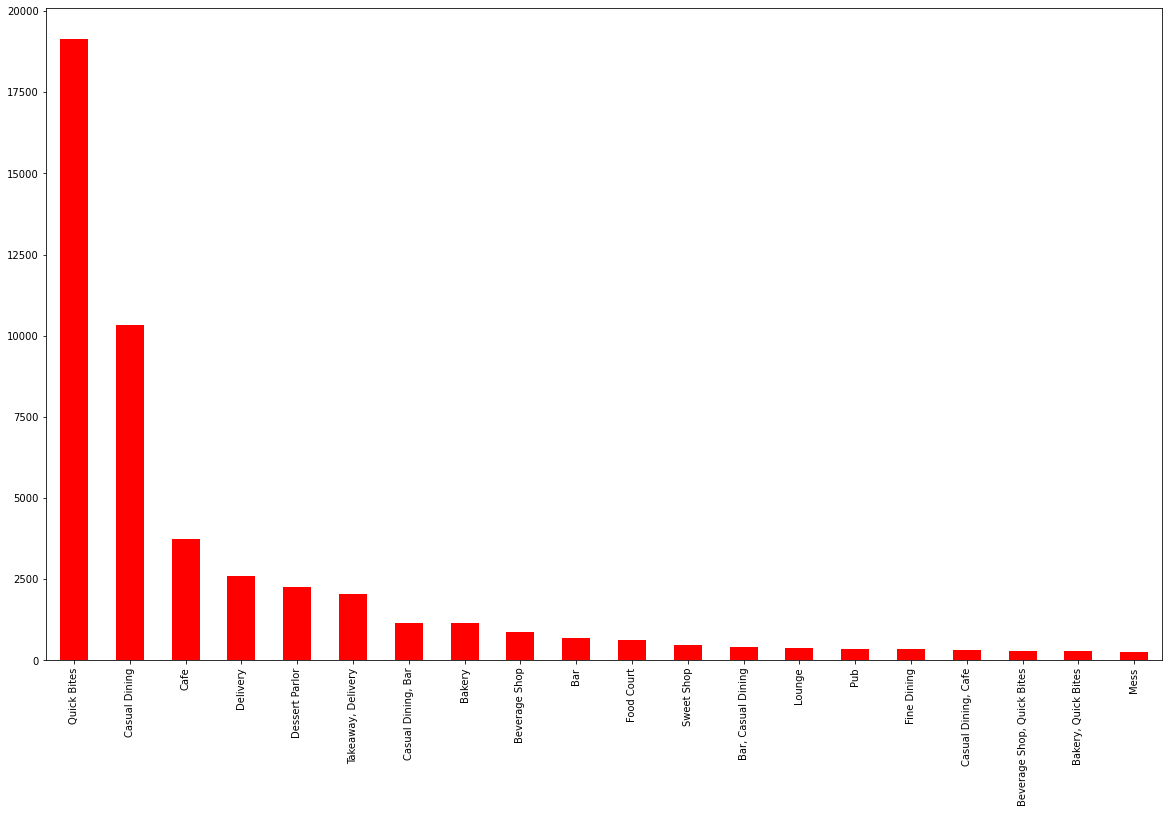

In [43]:
plt.figure(figsize = (20,12))
df['rest_type'].value_counts().nlargest(20).plot.bar(color = 'red')

In [44]:
def mark(x):
    if x in (['Quick Bites','Casual Dining']):
        return 'Quick Bites+Casual Dining'
    else:
        return 'others'

In [45]:
df['top_type'] = df['rest_type'].apply(mark)

In [46]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   top_type  
0          Buffet    Banashankari  Quick Bites+Casual Dining  
1          Buffet    Banashankari  Quick Bites+Casual Dining  
2          Buffet    Banashankari                     others  
3          Buffet    Banashankari  Quick Bites+Casual Dining  
4          Buffet    Banashankari  Quick Bites+Casual Dining

In [47]:
df['top_type'].value_counts()

Quick Bites+Casual Dining    29462
others                       22255
Name: top_type, dtype: int64

In [48]:
values = df['top_type'].value_counts().values
values

array([29462, 22255], dtype=int64)

In [49]:
keys = df['top_type'].value_counts().index
keys

Index(['Quick Bites+Casual Dining', 'others'], dtype='object')

In [50]:
import plotly.express as px

([<matplotlib.patches.Wedge at 0x2c1a2c501c0>,
 [Text(-0.2388691056005305, 1.0737511585044288, 'Quick Bites+Casual Dining'),
  Text(0.23886910560053065, -1.0737511585044286, 'others')],
 [Text(-0.13029223941847118, 0.5856824500933248, '57%'),
  Text(0.13029223941847123, -0.5856824500933246, '43%')])

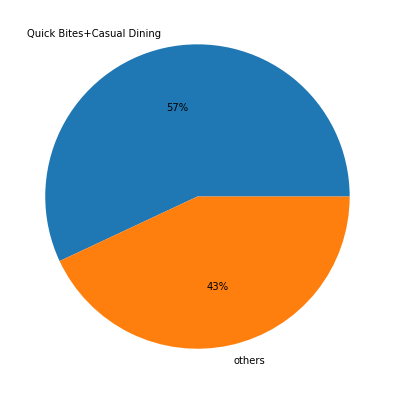

In [52]:
plt.figure(figsize = (10,7))
palette_color = sns.color_palette('bright')
plt.pie(values,labels=keys,autopct='%.0f%%')

In [53]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
top_type                        object
dtype: object

In [54]:
df['name'].nunique()

8792

In [55]:
df['name'].value_counts()

Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Natis                                                       1
Shreyas                                                     1
Vishwas Kabab Centre                                        1
Taj Biryani Centre                                          1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: name, Length: 8792, dtype: int64

In [56]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   top_type  
0          Buffet    Banashankari  Quick Bites+Casual Dining  
1          Buffet    Banashankari  Quick Bites+Casual Dining  
2          Buffet    Banashankari                     others  
3          Buffet    Banashankari  Quick Bites+Casual Dining  
4          Buffet    Banashankari  Quick Bites+Casual Dining

In [57]:
rest = df.groupby('name').agg({'votes':'sum','address':'count','approx_cost(for two people)':'mean','rate':'mean'}).reset_index()
rest

name  votes  address  \
0                                     #FeelTheROLL     14        2   
1                                       #L-81 Cafe    432        9   
2                                    #Vibes Restro      0        3   
3                                          #refuel    111        3   
4                           'Brahmins' Thatte Idli      0        1   
...                                            ...    ...      ...   
8787                                       late100      0        5   
8788                                       nu.tree   1443        8   
8789  re:cess - Hilton Bangalore Embassy GolfLinks    438        3   
8790                                    repEAT Hub      0        2   
8791                                     sCoolMeal      0        5   

      approx_cost(for two people)      rate  
0                           200.0  3.400000  
1                           400.0  3.900000  
2                           700.0       NaN  
3                           400.0  3.700000  
4                           100.0       NaN  
...                           ...       ...  
8787                        200.0       NaN  
8788                        400.0  4.314286  
8789                       1200.0  4.100000  
8790                        200.0       NaN  
8791                        300.0       NaN  

[8792 rows x 5 columns]

In [58]:
rest.columns = ['name','total_votes','total_unities','avg_appx_cost','mean_rating']

In [59]:
rest.head()

name  total_votes  total_unities  avg_appx_cost  \
0            #FeelTheROLL           14              2          200.0   
1              #L-81 Cafe          432              9          400.0   
2           #Vibes Restro            0              3          700.0   
3                 #refuel          111              3          400.0   
4  'Brahmins' Thatte Idli            0              1          100.0   

   mean_rating  
0          3.4  
1          3.9  
2          NaN  
3          3.7  
4          NaN

In [60]:
rest['votes_per_unity'] = rest['total_votes']/rest['total_unities']

In [61]:
rest.head()

name  total_votes  total_unities  avg_appx_cost  \
0            #FeelTheROLL           14              2          200.0   
1              #L-81 Cafe          432              9          400.0   
2           #Vibes Restro            0              3          700.0   
3                 #refuel          111              3          400.0   
4  'Brahmins' Thatte Idli            0              1          100.0   

   mean_rating  votes_per_unity  
0          3.4              7.0  
1          3.9             48.0  
2          NaN              0.0  
3          3.7             37.0  
4          NaN              0.0

In [62]:
popular = rest.sort_values(by = 'total_unities',ascending = False)

In [63]:
popular.head()

name  total_votes  total_unities  avg_appx_cost  \
1320    Cafe Coffee Day         3089             96     844.791667   
5549             Onesta       347520             85     600.000000   
3788          Just Bake         2898             73     400.000000   
2446  Empire Restaurant       229808             71     685.211268   
2577  Five Star Chicken         3134             70     257.857143   

      mean_rating  votes_per_unity  
1320     3.147191        32.177083  
5549     4.410588      4088.470588  
3788     3.355882        39.698630  
2446     3.916901      3236.732394  
2577     3.425000        44.771429

In [64]:
popular.shape

(8792, 6)

In [65]:
popular['name'].unique()

array(['Cafe Coffee Day', 'Onesta', 'Just Bake', ...,
       'Nethravathi Military Hotel', 'Swadisht North Indian Restaurant',
       'Night Punjabi Folk'], dtype=object)

Text(0.5, 1.0, 'top 5 least voted restaurants')

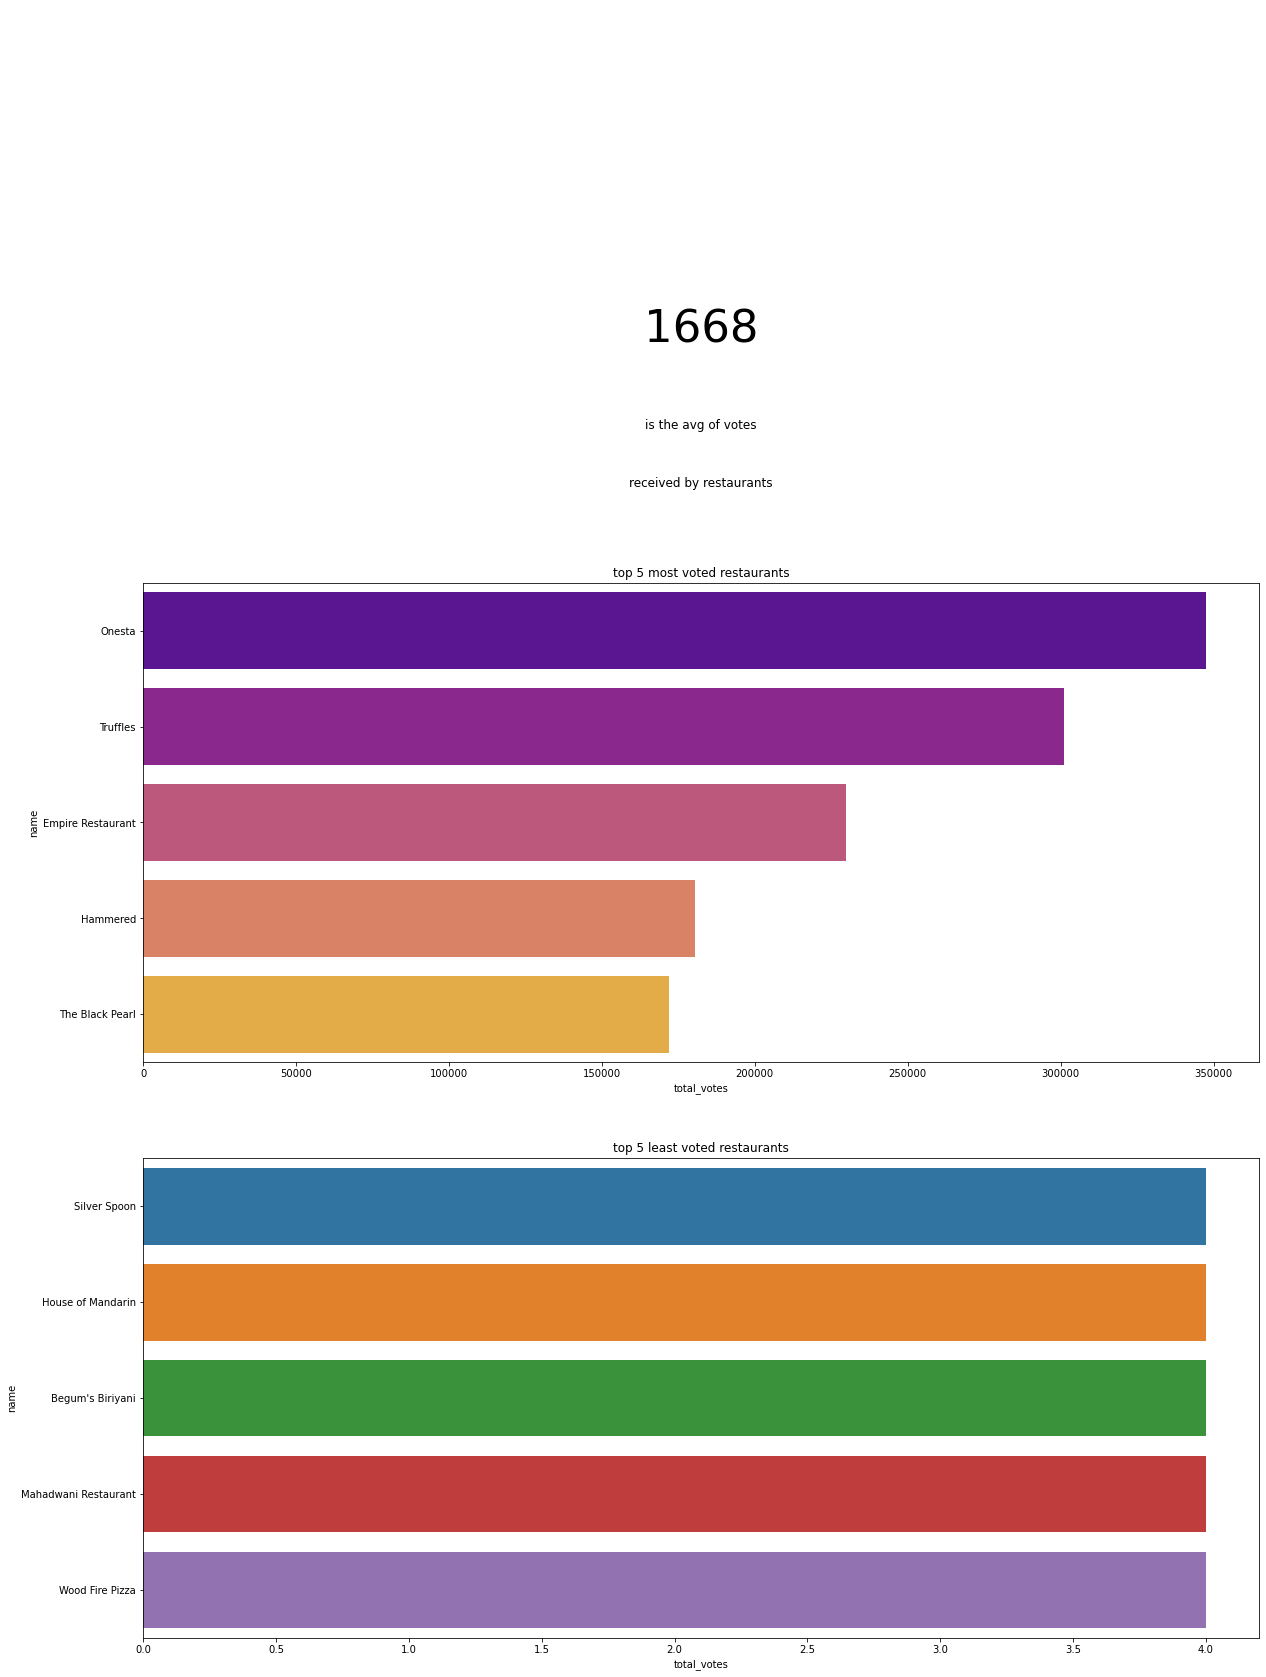

In [66]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,30))
ax1.text(0.50,0.30,int(popular['total_votes'].mean()),fontsize = 45,ha = 'center')
ax1.text(0.50,0.12,"is the avg of votes",fontsize = 12,ha = 'center')
ax1.text(0.50,0.00,'received by restaurants',fontsize = 12,ha = 'center')
ax1.axis('off')

sns.barplot(x = 'total_votes',y = 'name',data = popular.sort_values(by = 'total_votes',ascending = False).head(5),ax = ax2,palette = 'plasma')
ax2.set_title("top 5 most voted restaurants")
sns.barplot(x = 'total_votes',y = 'name',data = popular.sort_values(by = 'total_votes',ascending = False).query('total_votes>0').tail(5),ax = ax3)
ax3.set_title("top 5 least voted restaurants")

In [67]:
popular.sort_values(by = 'total_votes',ascending = False).tail(5)

name  total_votes  \
7283  Sriracha Robata & Contemporary Pan Asian Dining            0   
6551                                 Santruptii Sagar            0   
6547                           Santosh Juice Junction            0   
8465                                  Vibgyor Kitchen            0   
5375                               Night Punjabi Folk            0   

      total_unities  avg_appx_cost  mean_rating  votes_per_unity  
7283              2         1000.0          0.0              0.0  
6551              2          200.0          NaN              0.0  
6547              2          150.0          NaN              0.0  
8465              2          350.0          NaN              0.0  
5375              1          200.0          NaN              0.0

In [68]:
popular.sort_values(by = 'total_votes',ascending = False).query('total_votes>0').tail(5)

name  total_votes  total_unities  avg_appx_cost  \
6840          Silver Spoon            4              1          800.0   
3420     House of Mandarin            4              1          300.0   
858       Begum's Biriyani            4              1          500.0   
4580  Mahadwani Restaurant            4              1          300.0   
8632       Wood Fire Pizza            4              4          350.0   

      mean_rating  votes_per_unity  
6840         3.30              4.0  
3420         3.30              4.0  
858          3.20              4.0  
4580         3.30              4.0  
8632         1.55              1.0

In [69]:
sns.barplot(x = 'total_votes',y = 'name',data = popular.sort_values(by = 'total_votes',ascending = False).query('total_votes>0').head(5),ax = ax2)

<AxesSubplot:title={'center':'top 5 most voted restaurants'}, xlabel='total_votes', ylabel='name'>

Text(0.5, 1.0, 'top 5 cheapest restaurants')

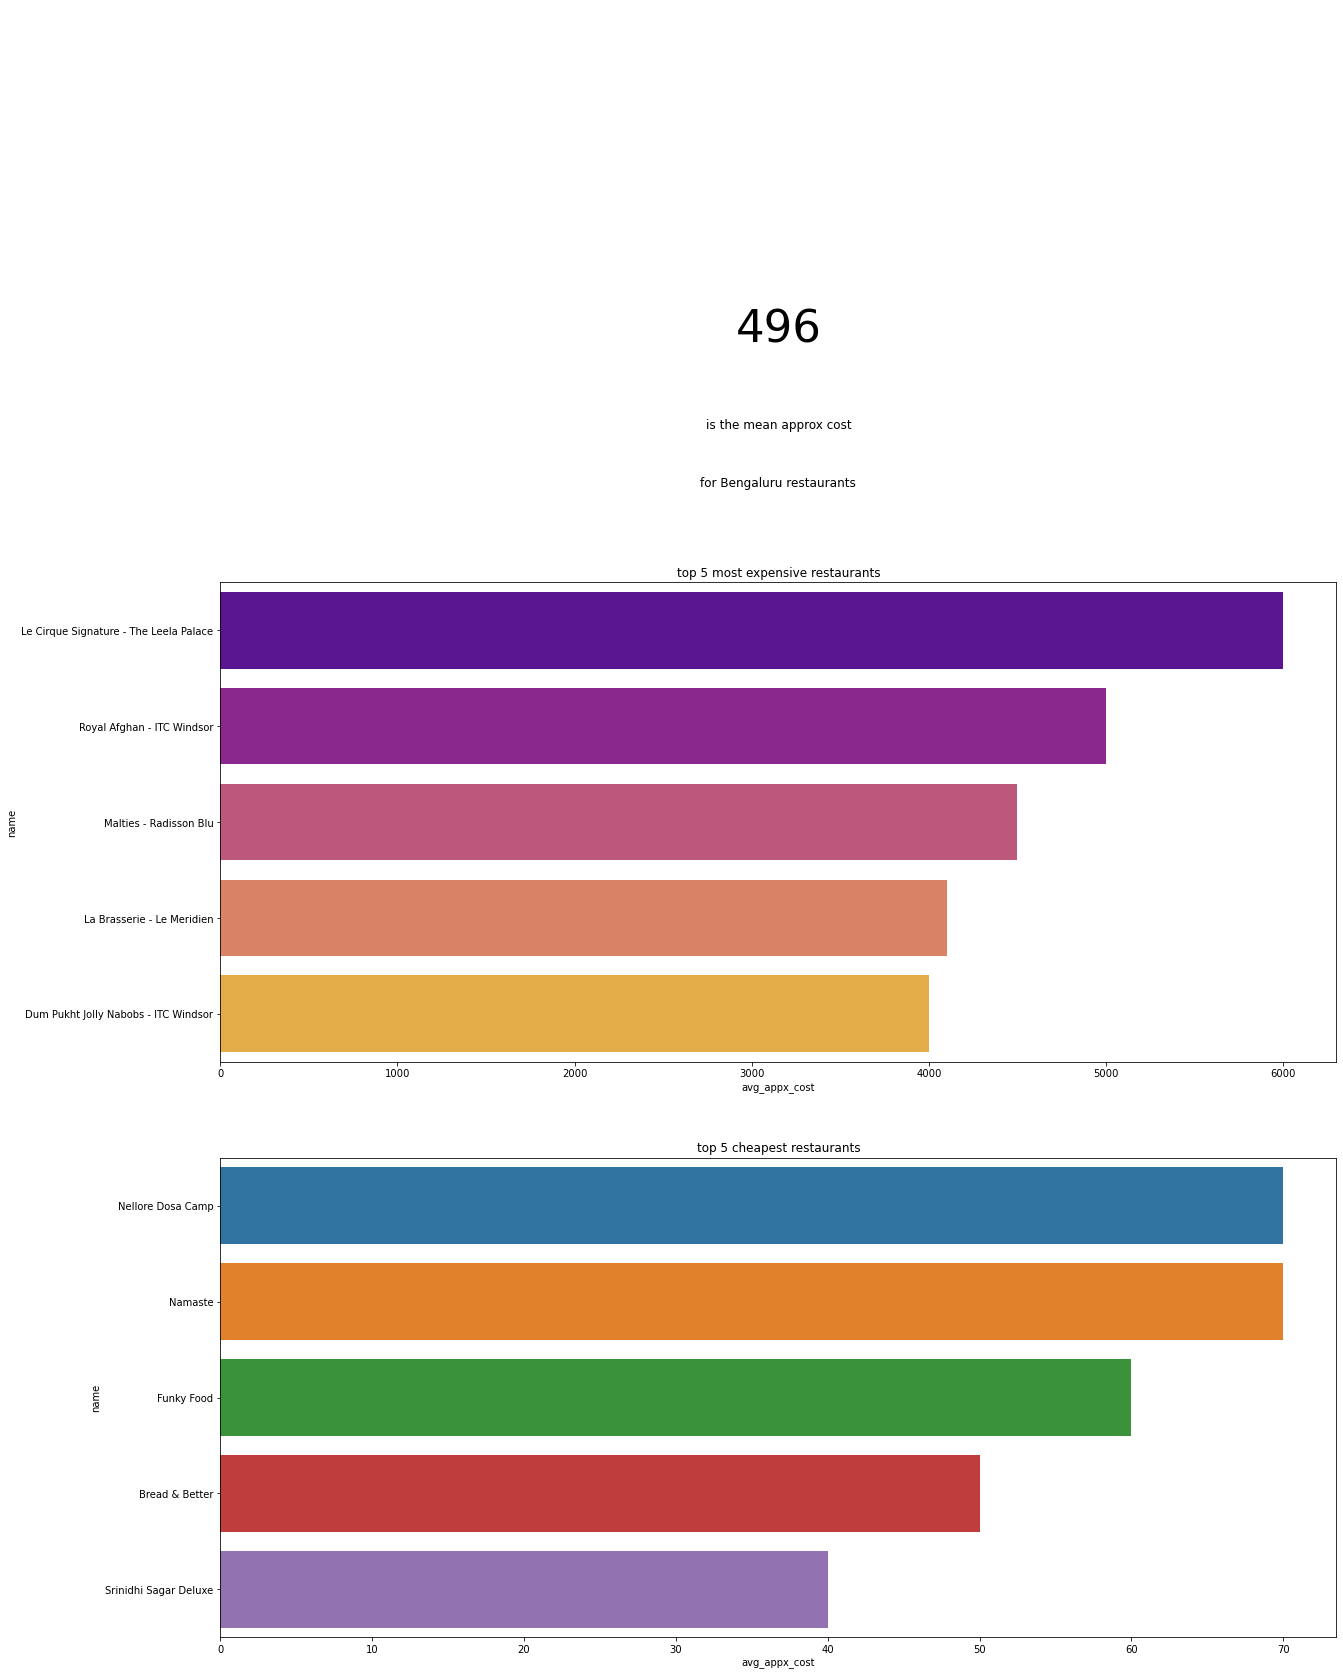

In [70]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize = (20,30))
ax1.text(0.50,0.30,int(popular['avg_appx_cost'].mean()),fontsize = 45,ha = 'center')
ax1.text(0.50,0.12,"is the mean approx cost",fontsize = 12,ha = 'center')
ax1.text(0.50,0.00,'for Bengaluru restaurants',fontsize = 12,ha = 'center')
ax1.axis('off')

sns.barplot(x = 'avg_appx_cost',y = 'name',data = popular.sort_values(by = 'avg_appx_cost',ascending = False).query('avg_appx_cost>0').head(5),ax = ax2,palette = 'plasma')
ax2.set_title("top 5 most expensive restaurants")
sns.barplot(x = 'avg_appx_cost',y = 'name',data = popular.sort_values(by = 'avg_appx_cost',ascending = False).query('avg_appx_cost>0').tail(5),ax = ax3)
ax3.set_title("top 5 cheapest restaurants")

In [71]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type'],
      dtype='object')

In [72]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   top_type  
0          Buffet    Banashankari  Quick Bites+Casual Dining  
1          Buffet    Banashankari  Quick Bites+Casual Dining  
2          Buffet    Banashankari                     others  
3          Buffet    Banashankari  Quick Bites+Casual Dining  
4          Buffet    Banashankari  Quick Bites+Casual Dining

In [73]:
df['online_order'].value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [74]:
df['book_table'].value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [75]:
x = df['book_table'].value_counts()
labels = ['not book','book']

In [76]:
val = df['book_table'].value_counts().values

In [77]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [78]:
fig = px.pie(df,names = labels,values = val)
fig.show()

In [79]:

trace = go.Pie(labels = labels,values = x,hoverinfo = 'label+percent',textinfo = 'percent')
iplot([trace])

In [80]:
y = df['online_order'].value_counts()
labels = ['yes','no']

In [81]:
px.pie(df,values = y,names = labels,title = 'Pie chart')

In [82]:
filter = (df['approx_cost(for two people)']<=400) & (df['location']=='Malleshwaram') & (df['rate']>=4) & (df['rest_type']=='Quick Bites')
budget = df[filter]
budget.head()

url  \
39461  https://www.zomato.com/bangalore/malleshwaram-...   
39486  https://www.zomato.com/bangalore/bhairaveshwar...   
39500  https://www.zomato.com/bangalore/dhanalakshmi-...   
39511  https://www.zomato.com/bangalore/halli-mane-ma...   
39517  https://www.zomato.com/bangalore/shuchi-ruchi-...   

                                                 address  \
39461  251, 17th Cross Road, Malleshwaram West, Malle...   
39486  86/6, 16th Pipeline Road, Malleshwaram, Bangalore   
39500  267 Near 18Th Cross Signal, Sampige Road, Mall...   
39511   3rd Cross, Sampige Road, Malleshwaram, Bangalore   
39517  92, 1st Main, 10th Cross Temple Road, Sampige ...   

                                name online_order book_table  rate  votes  \
39461       Malleshwaram Dosa Corner          Yes         No   4.4    104   
39486  Bhairaveshwara Military Hotel          Yes         No   4.1    133   
39500             Dhanalakshmi Grand          Yes         No   4.0     71   
39511                     Halli Mane          Yes         No   4.0   1192   
39517                   Shuchi Ruchi          Yes         No   4.0    340   

                                phone      location    rest_type  \
39461                  +91 7406053201  Malleshwaram  Quick Bites   
39486                  +91 8553206844  Malleshwaram  Quick Bites   
39500                  +91 9590485494  Malleshwaram  Quick Bites   
39511                  +91 8310558848  Malleshwaram  Quick Bites   
39517  +91 9448804902\n+91 7996992068  Malleshwaram  Quick Bites   

                                              dish_liked  \
39461                      Benne Masala Dosa, Aloo Palya   
39486                                            Biryani   
39500                                        Masala Dosa   
39511  Akki Rottis, Roti, Rava Idli, Filter Coffee, P...   
39517  Aloo Palya, Masala Poori, Panipuri, Rolls, Cha...   

                                  cuisines  approx_cost(for two people)  \
39461                         South Indian                        120.0   
39486             South Indian, Hyderabadi                        250.0   
39500           South Indian, North Indian                        300.0   
39511  South Indian, North Indian, Chinese                        250.0   
39517   Chinese, North Indian, Street Food                        350.0   

                                            reviews_list  \
39461  [('Rated 5.0', "RATED\n  This is as close as y...   
39486  [('Rated 4.0', 'RATED\n  Located in a clumpsy ...   
39500  [('Rated 4.0', 'RATED\n  I ordered masala dosh...   
39511  [('Rated 4.0', "RATED\n  They serve varieties ...   
39517  [('Rated 5.0', 'RATED\n  If you crave for CTR ...   

                                               menu_item listed_in(type)  \
39461  ['Special Khali Dose', 'Special Khali Dose', '...        Delivery   
39486                                                 []        Delivery   
39500  ['Rava Masala Dosa', 'Onion Rava Dosa', 'Panee...        Delivery   
39511  ['Paneer Butter Masala', 'Veg Masala', 'Paneer...        Delivery   
39517  ['Gobi Manchurian', 'Paneer Manchurian', 'Pane...        Delivery   

      listed_in(city)                   top_type  
39461    Malleshwaram  Quick Bites+Casual Dining  
39486    Malleshwaram  Quick Bites+Casual Dining  
39500    Malleshwaram  Quick Bites+Casual Dining  
39511    Malleshwaram  Quick Bites+Casual Dining  
39517    Malleshwaram  Quick Bites+Casual Dining

In [83]:
budget.shape

(55, 18)

In [84]:
budget['name'].unique()

array(['Malleshwaram Dosa Corner', 'Bhairaveshwara Military Hotel',
       'Dhanalakshmi Grand', 'Halli Mane', 'Shuchi Ruchi', 'CTR',
       'The Fast Food', 'Karavali Lunch Home', 'By 2 Coffee',
       "Domino's Pizza", 'Upsouth', 'Veena Stores', 'Holige Mane',
       'Mavalli Tiffin Room (MTR)', 'New Krishna Bhavan', 'Hotel Janatha',
       'KFC', 'Namma Kudla', 'Sai Shakti', "Sri Sai Ram's",
       "Chetty's Corner", "Sri Sairam's Chats and Juice"], dtype=object)

In [85]:
df.head(50)

url  \
0   https://www.zomato.com/bangalore/jalsa-banasha...   
1   https://www.zomato.com/bangalore/spice-elephan...   
2   https://www.zomato.com/SanchurroBangalore?cont...   
3   https://www.zomato.com/bangalore/addhuri-udupi...   
4   https://www.zomato.com/bangalore/grand-village...   
5   https://www.zomato.com/bangalore/timepass-dinn...   
6   https://www.zomato.com/bangalore/rosewood-inte...   
7   https://www.zomato.com/bangalore/onesta-banash...   
8   https://www.zomato.com/bangalore/penthouse-caf...   
9   https://www.zomato.com/bangalore/smacznego-ban...   
10  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
11  https://www.zomato.com/bangalore/cafe-shuffle-...   
12  https://www.zomato.com/bangalore/the-coffee-sh...   
13  https://www.zomato.com/bangalore/caf-eleven-ba...   
14  https://www.zomato.com/SanchurroBangalore?cont...   
15  https://www.zomato.com/bangalore/cafe-vivacity...   
16  https://www.zomato.com/bangalore/catch-up-ino-...   
17  https://www.zomato.com/bangalore/kirthis-birya...   
18  https://www.zomato.com/bangalore/t3h-cafe-bana...   
19  https://www.zomato.com/bangalore/360-atoms-res...   
20  https://www.zomato.com/bangalore/the-vintage-c...   
21  https://www.zomato.com/bangalore/woodee-pizza-...   
22  https://www.zomato.com/bangalore/cafe-coffee-d...   
23  https://www.zomato.com/bangalore/my-tea-house-...   
24  https://www.zomato.com/bangalore/hide-out-cafe...   
25  https://www.zomato.com/bangalore/cafe-nova-ban...   
26  https://www.zomato.com/bangalore/coffee-tindi-...   
27  https://www.zomato.com/bangalore/sea-green-caf...   
28  https://www.zomato.com/bangalore/cuppa-1-banas...   
29  https://www.zomato.com/bangalore/srinathjis-ca...   
30  https://www.zomato.com/bangalore/redberrys-bas...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
32  https://www.zomato.com/bangalore/sweet-truth-b...   
33  https://www.zomato.com/bangalore/ovenstory-piz...   
34  https://www.zomato.com/bangalore/faasos-banash...   
35  https://www.zomato.com/bangalore/behrouz-birya...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
37  https://www.zomato.com/bangalore/szechuan-drag...   
38  https://www.zomato.com/bangalore/empire-restau...   
39  https://www.zomato.com/bangalore/maruthi-davan...   
40  https://www.zomato.com/bangalore/chaatimes-bas...   
41  https://www.zomato.com/bangalore/havyaka-mess-...   
42  https://www.zomato.com/bangalore/mcdonalds-ban...   
43  https://www.zomato.com/bangalore/dominos-pizza...   
44  https://www.zomato.com/bangalore/onesta-banash...   
45  https://www.zomato.com/bangalore/hotboxit-bana...   
46  https://www.zomato.com/bangalore/kitchen-garde...   
47  https://www.zomato.com/bangalore/recipe-kumara...   
48  https://www.zomato.com/bangalore/beijing-bites...   
49  https://www.zomato.com/bangalore/tasty-bytes-k...   

                                              address  \
0   942, 21st Main Road, 2nd Stage, Banashankari, ...   
1   2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2   1112, Next to KIMS Medical College, 17th Cross...   
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4   10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
6   19/1, New Timberyard Layout, Beside Satellite ...   
7   2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
8   1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
9   2470, 21 Main Road, 25th Cross, Banashankari, ...   
10  12,29 Near PES University Back Gate, D'Souza N...   
11  941, 3rd FLOOR, 21st Main, 22nd Cross, Banasha...   
12      6th Block, 3rd Stage, Banashankari, Bangalore   
13  111, Sapphire Toys Building, 100 Feet Ring Roa...   
14  1112, Next to KIMS Medical College, 17th Cross...   
15  2303, 21st Cross, K R Road, 2nd Stage, Banasha...   
16  241, 4th Floor, 100 Feet Ring Road, Opposite K...   
17  405, 24th Cross, 9th Main, 2nd Stage, Banashan...   
18  504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
19

In [86]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', nan, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan 

In [87]:
def return_budget(loc,rest_type):
    filter = (df['approx_cost(for two people)']<=400) & (df['location']==loc) & (df['rate']>=4) & (df['rest_type']==rest_type)
    budget = df[filter]
    return (budget['name'].unique())

In [88]:
return_budget('BTM','Quick Bites')

array(['Hiyar Majhe Kolkata', 'Swadista Aahar', 'Swad Punjab Da',
       'Roti Wala', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Nanna Munna Paratha House', 'Chaatimes',
       'Andhra Kitchen', "Muthashy's", 'Ashirvaad Grand', 'Petoo',
       'Ilyazsab The House Of Chicken', 'Kannur Food Point',
       "Domino's Pizza", 'KFC', 'Hari Super Sandwich',
       'The Biriyani Pedia', 'World Of Asia'], dtype=object)

In [89]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   top_type  
0          Buffet    Banashankari  Quick Bites+Casual Dining  
1          Buffet    Banashankari  Quick Bites+Casual Dining  
2          Buffet    Banashankari                     others  
3          Buffet    Banashankari  Quick Bites+Casual Dining  
4          Buffet    Banashankari  Quick Bites+Casual Dining

In [90]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [91]:
from geopy.geocoders import Nominatim

In [92]:
geolocator = Nominatim(user_agent = 'app')


In [93]:
data = df['name'][0]

In [94]:
data = geolocator.geocode(data)

In [95]:
data.latitude

43.5625752

In [96]:
data.longitude

-79.7107038

In [97]:
df.shape

(51717, 18)

In [98]:
df['location'].nunique()

93

In [99]:
locations = pd.DataFrame(df['location'].unique())
locations
locations.columns = ['Name']
locations

Name
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
89      West Bangalore
90         Magadi Road
91           Yelahanka
92      Sahakara Nagar
93              Peenya

[94 rows x 1 columns]

In [100]:
locations = pd.DataFrame({'Name':df['location'].unique()})
locations

Name
0         Banashankari
1         Basavanagudi
2          Mysore Road
3            Jayanagar
4   Kumaraswamy Layout
..                 ...
89      West Bangalore
90         Magadi Road
91           Yelahanka
92      Sahakara Nagar
93              Peenya

[94 rows x 1 columns]

In [101]:
def latitude(x):
    location = geolocator.geocode(x)
    if location is None:
        return np.nan
    else:
        return location.latitude
def longitude(x):
    location = geolocator.geocode(x)
    if location is None:
        return np.nan
    else:
        return location.longitude
    

In [102]:
locations['latitude'] = locations['Name'].apply(latitude)
locations['longitude'] = locations['Name'].apply(longitude)


In [103]:
locations.head()

Name   latitude  longitude
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.946703  77.530070
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

In [104]:
lat = []
lon = []
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [105]:
locations['latitude'] = lat
locations['longitude'] = lon
locations.head()

Name   latitude  longitude
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.946703  77.530070
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

In [106]:
rest_loc = df['location'].value_counts().reset_index()
rest_loc

index  location
0                     BTM      5124
1                     HSR      2523
2   Koramangala 5th Block      2504
3                JP Nagar      2235
4              Whitefield      2144
..                    ...       ...
88         West Bangalore         6
89              Yelahanka         6
90                 Jakkur         3
91   Rajarajeshwari Nagar         2
92                 Peenya         1

[93 rows x 2 columns]

In [107]:
rest_loc.columns = ['Name','count']
rest_loc

Name  count
0                     BTM   5124
1                     HSR   2523
2   Koramangala 5th Block   2504
3                JP Nagar   2235
4              Whitefield   2144
..                    ...    ...
88         West Bangalore      6
89              Yelahanka      6
90                 Jakkur      3
91   Rajarajeshwari Nagar      2
92                 Peenya      1

[93 rows x 2 columns]

In [108]:
rest_loc2 = rest_loc.merge(locations,on = 'Name').dropna()

In [109]:
rest_loc2

Name  count   latitude   longitude
0                     BTM   5124  45.954851 -112.496595
1                     HSR   2523  18.147500   41.538889
2   Koramangala 5th Block   2504  12.934843   77.618977
3                JP Nagar   2235  12.265594   76.646540
4              Whitefield   2144  53.553368   -2.296902
..                    ...    ...        ...         ...
88         West Bangalore      6  12.984852   77.540063
89              Yelahanka      6  13.100698   77.596345
90                 Jakkur      3  13.078474   77.606894
91   Rajarajeshwari Nagar      2  12.927441   77.515522
92                 Peenya      1  13.032942   77.527325

[92 rows x 4 columns]

In [110]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [111]:
import folium

In [112]:
from folium.plugins import HeatMap
basemap = folium.Map(location = [12.97,77.59])
basemap

In [113]:
HeatMap(data = rest_loc2[['latitude','longitude','count']]).add_to(basemap)

In [114]:
basemap

In [115]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [116]:
from wordcloud import WordCloud,STOPWORDS


In [117]:
data = df[df['rest_type'] == 'Quick Bites']

In [118]:
data.head()

url  \
3   https://www.zomato.com/bangalore/addhuri-udupi...   
31  https://www.zomato.com/bangalore/foodiction-1-...   
34  https://www.zomato.com/bangalore/faasos-banash...   
36  https://www.zomato.com/bangalore/fast-and-fres...   
39  https://www.zomato.com/bangalore/maruthi-davan...   

                                              address  \
3   1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31  2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34  80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36  32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39  556/A, Water Tank Road, 3rd Stage, Banashankar...   

                            name online_order book_table  rate  votes  \
3          Addhuri Udupi Bhojana           No         No   3.7     88   
31                    Foodiction          Yes         No   2.8    506   
34                        Faasos          Yes         No   4.2    415   
36                Fast And Fresh          Yes         No   2.8     91   
39  Maruthi Davangere Benne Dosa          Yes         No   4.0     17   

             phone      location    rest_type  \
3   +91 9620009302  Banashankari  Quick Bites   
31  +91 9916107070  Banashankari  Quick Bites   
34  +91 7700020020  Banashankari  Quick Bites   
36  +91 9742974232  Banashankari  Quick Bites   
39  +91 9019563485  Banashankari  Quick Bites   

                                           dish_liked  \
3                                         Masala Dosa   
31  Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34  Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                NaN   
39                                                NaN   

                                    cuisines  approx_cost(for two people)  \
3                 South Indian, North Indian                        300.0   
31  North Indian, Fast Food, Chinese, Burger                        500.0   
34          North Indian, Biryani, Fast Food                        500.0   
36          North Indian, Chinese, Fast Food                        400.0   
39                              South Indian                        150.0   

                                         reviews_list  \
3   [('Rated 4.0', "RATED\n  Great food and proper...   
31  [('Rated 1.0', "RATED\n  Worst restaurant ever...   
34  [('Rated 3.0', 'RATED\n  Not worth for the mon...   
36  [('Rated 1.0', 'RATED\n  Half baked rice in a ...   
39  [('Rated 5.0', "RATED\n  This restaurant serve...   

                                            menu_item listed_in(type)  \
3                                                  []          Buffet   
31                                                 []        Delivery   
34  ['Chole Kulcha Meal', 'Upvas Aloo Paratha With...        Delivery   
36                                                 []        Delivery   
39  ['Benne Dosa', 'Benne Masala Dosa', 'Benne Kal...        Delivery   

   listed_in(city)                   top_type  
3     Banashankari  Quick Bites+Casual Dining  
31    Banashankari  Quick Bites+Casual Dining  
34    Banashankari  Quick Bites+Casual Dining  
36    Banashankari  Quick Bites+Casual Dining  
39    Banashankari  Quick Bites+Casual Dining

In [119]:
data['dish_liked'][31].split()

['Burgers,',
 'Lassi,',
 'Chicken',
 'Grill,',
 'Naan,',
 'Momos,',
 'Chicken',
 'Burger,',
 'Biryani']

In [120]:
dishes = ''
for word in data['dish_liked'].dropna():
    words = word.split()
    for i in range(len(words)):
        words[i] = words[i].lower()
    dishes = dishes+' '.join(words)+' '

In [121]:
data['dish_liked'].isnull().sum()

13843

In [122]:
dishes

'masala dosa burgers, lassi, chicken grill, naan, momos, chicken burger, biryani rolls, veggie wrap, chocolate fantasy, rice bowls, chicken rice, paneer makhanwala, chicken tikka wrap dabeli, faluda, masala poori, sandwiches, tokri chaat, pav bhaji, dahipuri burgers, fries, hot chocolate pane pizza, lava cake, pasta, stuffed garlic bread, chocolava cake, tacos biryani paratha, pasta pasta, momos, rolls, chicken roll, chilli chicken, paneer roll, spaghetti grape juice, chicken grill, chicken tikka roll, shawarma roll, chicken shawarama, biryani combo, rolls vegetable biryani, ginger chicken, chicken biryani, donne biryani, chicken kebab, egg bhurji, dum biryani rolls, momos, fries, veggie roll, chicken kebab roll, paneer roll, cheese roll benne dosa, mirchi bajji, filter coffee, poha, tea, butter dosa, crispy dosa masala dosa panipuri, chaat, noodles, dahi bhalle rooftop ambience coffee, tea, kesari bath, open dosa, vada, idli, bread dosa masala dosa, tirupathi pongal, filter coffee, va

In [123]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords =stopwords, width = 1500, height = 1500).generate(dishes)

(-0.5, 1499.5, 1499.5, -0.5)

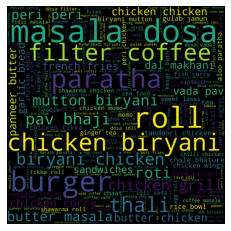

In [124]:
plt.imshow(wordcloud)
plt.axis('off')

In [125]:
data = df['reviews_list'][0]
data

'[(\'Rated 4.0\', \'RATED\\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.\'), (\'Rated 4.0\', \'RATED\\n  I was here for dinner with my family on a weekday. The restaurant was completely empty. Ambience is good with some good old hindi music. Seating arrangement are good too. We ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. Food was fresh and good, service is good too. Good for family hangout.\\nCheers\'), (\'Rated 2.0\', \'RATED\\n  Its a restaurant near to Banashankari BDA. Me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. On inquiring they said this plac

In [126]:
data = data.lower()
data

'[(\'rated 4.0\', \'rated\\n  a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.\'), (\'rated 4.0\', \'rated\\n  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.\\ncheers\'), (\'rated 2.0\', \'rated\\n  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this plac

In [127]:
import re

In [128]:
data2 = re.sub('[^a-zA-Z]',' ',data)
data2

'   rated        rated n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again       rated        rated n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers      rated        rated n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly vis

In [129]:
data3 = re.sub('rated',' ',data2)
data3

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [130]:
data4 = re.sub('x',' ',data3)
data4

'              n  a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again                  n  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad  panner and baby corn starters  lemon and corrionder soup  butter roti  olive and chilli paratha  food was fresh and good  service is good too  good for family hangout  ncheers                 n  its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  any

In [131]:
data5 = re.sub(' +',' ',data4)
data5

' n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte items which took ages to come food was o

In [132]:
dataset = df[df['rest_type'] == 'Quick Bites']

In [133]:
dataset

url  \
3      https://www.zomato.com/bangalore/addhuri-udupi...   
31     https://www.zomato.com/bangalore/foodiction-1-...   
34     https://www.zomato.com/bangalore/faasos-banash...   
36     https://www.zomato.com/bangalore/fast-and-fres...   
39     https://www.zomato.com/bangalore/maruthi-davan...   
...                                                  ...   
51641  https://www.zomato.com/bangalore/andhra-spices...   
51642  https://www.zomato.com/bangalore/basaveshwara-...   
51643  https://www.zomato.com/bangalore/new-ambur-bir...   
51644  https://www.zomato.com/bangalore/punjabi-thadk...   
51645  https://www.zomato.com/bangalore/raapchick-bro...   

                                                 address  \
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
31     2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
36     32, 7th Main Road, Dwaraka Nagar,Near PES Coll...   
39     556/A, Water Tank Road, 3rd Stage, Banashankar...   
...                                                  ...   
51641  188, ITPL Main Road, Brookefields, Bangalore, ...   
51642  Nanjudeshwari complex, Oppsite Brookefield Mal...   
51643  AECS Layout, ITPL Main Road, Brookefield, Bang...   
51644  7/3, ASK Tower, Kundanahalli Gate, Next to Bat...   
51645  Opposite Brookefield Mall, Kundanhalli, Brooke...   

                               name online_order book_table  rate  votes  \
3             Addhuri Udupi Bhojana           No         No   3.7     88   
31                       Foodiction          Yes         No   2.8    506   
34                           Faasos          Yes         No   4.2    415   
36                   Fast And Fresh          Yes         No   2.8     91   
39     Maruthi Davangere Benne Dosa          Yes         No   4.0     17   
...                             ...          ...        ...   ...    ...   
51641                 Andhra Spices           No         No   3.2      4   
51642        Basaveshwara Khanavali           No         No   NaN      0   
51643             New Ambur Biryani           No         No   NaN      0   
51644                Punjabi Thadka           No         No   NaN      0   
51645                     Raapchick          Yes         No   3.6     49   

                                phone      location    rest_type  \
3                      +91 9620009302  Banashankari  Quick Bites   
31                     +91 9916107070  Banashankari  Quick Bites   
34                     +91 7700020020  Banashankari  Quick Bites   
36                     +91 9742974232  Banashankari  Quick Bites   
39                     +91 9019563485  Banashankari  Quick Bites   
...                               ...           ...          ...   
51641                             NaN   Brookefield  Quick Bites   
51642  +91 9740912864\n+91 7353747430   Brookefield  Quick Bites   
51643                  +91 9443087893   Brookefield  Quick Bites   
51644  +91 7338330336\n+91 9591568221   Brookefield  Quick Bites   
51645    080 41717785\n+91 9571153004   Brookefield  Quick Bites   

                                              dish_liked  \
3                                            Masala Dosa   
31     Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...   
34     Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
36                                                   NaN   
39                                                   NaN   
...                                                  ...   
51641                                                NaN   
51642                                                NaN   
51643                                                NaN   
51644                                                NaN   
51645                                            Burgers   

                                       cuisines  approx_cost(for two people)  \
3                    South Indian, North Indian                        300.0   


In [134]:
total_review = ' '
for review in dataset['reviews_list']:
    review = review.lower()
    review = re.sub('[^a-zA-Z]',' ',review)
    review = re.sub('rated',' ',review)
    review = re.sub('x',' ',review)
    review = re.sub(' +',' ',review)
    total_review = total_review+str(review)

#review = dataset['reviews_list'][0]   
    

In [135]:
wordcloud2 = WordCloud(stopwords = stopwords, width = 1500, height = 1500).generate(total_review)

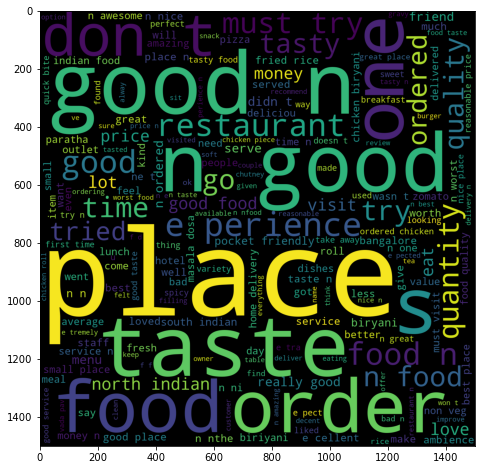

In [136]:
plt.figure(figsize = (12,8))
plt.imshow(wordcloud2)

In [137]:
dataset['reviews_list'].dtype

dtype('O')

In [138]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   top_type  
0          Buffet    Banashankari  Quick Bites+Casual Dining  
1          Buffet    Banashankari  Quick Bites+Casual Dining  
2          Buffet    Banashankari                     others  
3          Buffet    Banashankari  Quick Bites+Casual Dining  
4          Buffet    Banashankari  Quick Bites+Casual Dining

In [139]:
df['reviews_list'].dtype

dtype('O')

In [140]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   top_type  
0          Buffet    Banashankari  Quick Bites+Casual Dining  
1          Buffet    Banashankari  Quick Bites+Casual Dining  
2          Buffet    Banashankari                     others  
3          Buffet    Banashankari  Quick Bites+Casual Dining  
4          Buffet    Banashankari  Quick Bites+Casual Dining

In [141]:
def assign(x):
    if x>0:
        return 1
    else:
        return 0

In [142]:
df['rated'] = df['rate'].apply(assign)

In [143]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type', 'rated'],
      dtype='object')

In [144]:
df['rated'].unique()

array([1, 0], dtype=int64)

In [145]:
new_restaurants = df[df['rated'] == 0]  #test data

In [146]:
train_val_restaurants = df.query('rated==1')

In [147]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   top_type  rated  
0          Buffet    Banashankari  Quick Bites+Casual Dining      1  
1          Buffet    Banashankari  Quick Bites+Casual Dining      1  
2          Buffet    Banashankari                     others      1  
3          Buffet    Banashankari  Quick Bites+Casual Dining      1  
4          Buffet    Banashankari  Quick Bites+Casual Dining      1

In [148]:
train_val_restaurants.shape

(41665, 19)

In [149]:
train_val_restaurants = df[df['rated']==1]

In [150]:
train_val_restaurants['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [151]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [152]:
threshold = 3.75
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(lambda x:1 if x>=threshold else 0)

In [153]:
def target(X):
    if X>= threshold:
        return 1
    else:
        return 0

In [154]:
threshold = 3.75
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(target)

In [155]:
train_val_restaurants

url  \
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalore/addhuri-udupi...   
4      https://www.zomato.com/bangalore/grand-village...   
...                                                  ...   
51709  https://www.zomato.com/bangalore/the-farm-hous...   
51711  https://www.zomato.com/bangalore/bhagini-2-whi...   
51712  https://www.zomato.com/bangalore/best-brews-fo...   
51715  https://www.zomato.com/bangalore/chime-sherato...   
51716  https://www.zomato.com/bangalore/the-nest-the-...   

                                                 address  \
0      942, 21st Main Road, 2nd Stage, Banashankari, ...   
1      2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
2      1112, Next to KIMS Medical College, 17th Cross...   
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
4      10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
...                                                  ...   
51709  136, SAP Labs India, KIADB Export Promotion In...   
51711  139/C1, Next To GR Tech Park, Pattandur Agraha...   
51712  Four Points by Sheraton Bengaluru, 43/3, White...   
51715  Sheraton Grand Bengaluru Whitefield Hotel & Co...   
51716  ITPL Main Road, KIADB Export Promotion Industr...   

                                                    name online_order  \
0                                                  Jalsa          Yes   
1                                         Spice Elephant          Yes   
2                                        San Churro Cafe          Yes   
3                                  Addhuri Udupi Bhojana           No   
4                                          Grand Village           No   
...                                                  ...          ...   
51709                         The Farm House Bar n Grill           No   
51711                                            Bhagini           No   
51712  Best Brews - Four Points by Sheraton Bengaluru...           No   
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No   
51716                       The Nest - The Den Bengaluru           No   

      book_table  rate  votes                             phone  \
0            Yes   4.1    775    080 42297555\r\n+91 9743772233   
1             No   4.1    787                      080 41714161   
2             No   3.8    918                    +91 9663487993   
3             No   3.7     88                    +91 9620009302   
4             No   3.8    166  +91 8026612447\r\n+91 9901210005   
...          ...   ...    ...                               ...   
51709         No   3.7     34    +91 9980121279\n+91 9900240646   
51711         No   2.5     81                      080 65951222   
51712         No   3.6     27                      080 40301477   
51715        Yes   4.3    236                      080 49652769   
51716         No   3.4     13                    +91 8071117272   

                         location            rest_type  \
0                    Banashankari        Casual Dining   
1                    Banashankari        Casual Dining   
2                    Banashankari  Cafe, Casual Dining   
3                    Banashankari          Quick Bites   
4                    Basavanagudi        Casual Dining   
...                           ...                  ...   
51709                  Whitefield   Casual Dining, Bar   
51711                  Whitefield   Casual Dining, Bar   
51712                  Whitefield                  Bar   
51715  ITPL Main Road, Whitefield                  Bar   
51716  ITPL Main Road, Whitefield   Bar, Casual Dining   

                                              dish_liked  \
0      Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1      Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2      Churros, Cannelloni, Minestrone Soup, Hot Cho

In [156]:
x = train_val_restaurants['target'].value_counts()

In [157]:
x

0    21421
1    20244
Name: target, dtype: int64

In [158]:
labels = x.index
labels

Int64Index([0, 1], dtype='int64')

([<matplotlib.patches.Wedge at 0x2c1a8021820>,
 [Text(-0.04879500100763322, 1.0989172161162393, '0'),
  Text(0.04879500100763285, -1.0989172161162393, '1')],
 [Text(-0.026615455095072665, 0.5994093906088577, '51%'),
  Text(0.02661545509507246, -0.5994093906088577, '49%')])

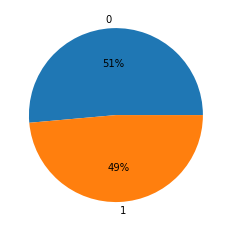

In [159]:
plt.pie(x,labels = labels,autopct = '%.0f%%')

In [160]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                        800.0   
1     Chinese, North Indian, Thai                        800.0   
2          Cafe, Mexican, Italian                        800.0   
3      South Indian, North Indian                        300.0   
4        North Indian, Rajasthani                        600.0   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)                   top_type  rated  target  
0          Buffet    Banashankari  Quick Bites+Casual Dining      1       1  
1          Buffet    Banashankari  Quick Bites+Casual Dining      1       1  
2          Buffet    Banashankari                     others      1       1  
3          Buffet    Banashankari  Quick Bites+Casual Dining      1       0  
4          Buffet    Banashankari  Quick Bites+Casual Dining      1       1

In [161]:
def count(x):
    return len(x.split(','))

In [162]:
train_val_restaurants['cuisines'][0].split(',')

['North Indian', ' Mughlai', ' Chinese']

In [163]:
train_val_restaurants['total_cuisines'] = train_val_restaurants['cuisines'].astype(str).apply(count)

In [164]:
train_val_restaurants['multiple_types'] = train_val_restaurants['rest_type'].astype(str).apply(count)

In [165]:
train_val_restaurants.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  ... approx_cost(for two people)  \
0  Banashankari        Casual Dining  ...                       800.0   
1  Banashankari        Casual Dining  ...                       800.0   
2  Banashankari  Cafe, Casual Dining  ...                       800.0   
3  Banashankari          Quick Bites  ...                       300.0   
4  Basavanagudi        Casual Dining  ...                       600.0   

                                        reviews_list  menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...         []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...         []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...         []   
3  [('Rated 4.0', "RATED\n  Great food and proper...         []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...         []   

  listed_in(type) listed_in(city)                   top_type rated target  \
0          Buffet    Banashankari  Quick Bites+Casual Dining     1      1   
1          Buffet    Banashankari  Quick Bites+Casual Dining     1      1   
2          Buffet    Banashankari                     others     1      1   
3          Buffet    Banashankari  Quick Bites+Casual Dining     1      0   
4          Buffet    Banashankari  Quick Bites+Casual Dining     1      1   

   total_cuisines  multiple_types  
0               3               1  
1               3               1  
2               3               2  
3               2               1  
4               2               1  

[5 rows x 22 columns]

In [166]:
train_val_restaurants.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'top_type', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [167]:
imp_Features = ['online_order', 'book_table', 'location', 'rest_type',
       'approx_cost(for two people)',
       'listed_in(type)', 'listed_in(city)', 'target',
       'total_cuisines', 'multiple_types']

In [168]:
data = train_val_restaurants[imp_Features]

In [169]:
data

online_order book_table                    location  \
0              Yes        Yes                Banashankari   
1              Yes         No                Banashankari   
2              Yes         No                Banashankari   
3               No         No                Banashankari   
4               No         No                Basavanagudi   
...            ...        ...                         ...   
51709           No         No                  Whitefield   
51711           No         No                  Whitefield   
51712           No         No                  Whitefield   
51715           No        Yes  ITPL Main Road, Whitefield   
51716           No         No  ITPL Main Road, Whitefield   

                 rest_type  approx_cost(for two people) listed_in(type)  \
0            Casual Dining                        800.0          Buffet   
1            Casual Dining                        800.0          Buffet   
2      Cafe, Casual Dining                        800.0          Buffet   
3              Quick Bites                        300.0          Buffet   
4            Casual Dining                        600.0          Buffet   
...                    ...                          ...             ...   
51709   Casual Dining, Bar                        800.0   Pubs and bars   
51711   Casual Dining, Bar                        800.0   Pubs and bars   
51712                  Bar                       1500.0   Pubs and bars   
51715                  Bar                       2500.0   Pubs and bars   
51716   Bar, Casual Dining                       1500.0   Pubs and bars   

      listed_in(city)  target  total_cuisines  multiple_types  
0        Banashankari       1               3               1  
1        Banashankari       1               3               1  
2        Banashankari       1               3               2  
3        Banashankari       0               2               1  
4        Banashankari       1               2               1  
...               ...     ...             ...             ...  
51709      Whitefield       0               2               2  
51711      Whitefield       0               4               2  
51712      Whitefield       0               1               1  
51715      Whitefield       1               1               1  
51716      Whitefield       0               3               2  

[41665 rows x 10 columns]

In [170]:
data.shape

(41665, 10)

In [171]:
data.head

<bound method NDFrame.head of       online_order book_table                    location  \
0              Yes        Yes                Banashankari   
1              Yes         No                Banashankari   
2              Yes         No                Banashankari   
3               No         No                Banashankari   
4               No         No                Basavanagudi   
...            ...        ...                         ...   
51709           No         No                  Whitefield   
51711           No         No                  Whitefield   
51712           No         No                  Whitefield   
51715           No        Yes  ITPL Main Road, Whitefield   
51716           No         No  ITPL Main Road, Whitefield   

                 rest_type  approx_cost(for two people) listed_in(type)  \
0            Casual Dining                        800.0          Buffet   
1            Casual Dining                        800.0          Buffet   
2      Cafe,

In [172]:
data.head()

online_order book_table      location            rest_type  \
0          Yes        Yes  Banashankari        Casual Dining   
1          Yes         No  Banashankari        Casual Dining   
2          Yes         No  Banashankari  Cafe, Casual Dining   
3           No         No  Banashankari          Quick Bites   
4           No         No  Basavanagudi        Casual Dining   

   approx_cost(for two people) listed_in(type) listed_in(city)  target  \
0                        800.0          Buffet    Banashankari       1   
1                        800.0          Buffet    Banashankari       1   
2                        800.0          Buffet    Banashankari       1   
3                        300.0          Buffet    Banashankari       0   
4                        600.0          Buffet    Banashankari       1   

   total_cuisines  multiple_types  
0               3               1  
1               3               1  
2               3               2  
3               2               1  
4               2               1

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41665 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   online_order                 41665 non-null  object 
 1   book_table                   41665 non-null  object 
 2   location                     41665 non-null  object 
 3   rest_type                    41516 non-null  object 
 4   approx_cost(for two people)  41418 non-null  float64
 5   listed_in(type)              41665 non-null  object 
 6   listed_in(city)              41665 non-null  object 
 7   target                       41665 non-null  int64  
 8   total_cuisines               41665 non-null  int64  
 9   multiple_types               41665 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 4.5+ MB


In [174]:
data.shape

(41665, 10)

In [175]:
data.isnull().sum()

online_order                     0
book_table                       0
location                         0
rest_type                      149
approx_cost(for two people)    247
listed_in(type)                  0
listed_in(city)                  0
target                           0
total_cuisines                   0
multiple_types                   0
dtype: int64

In [176]:
data = data.dropna()

In [177]:
data.shape

(41271, 10)

In [178]:
data.dtypes

online_order                    object
book_table                      object
location                        object
rest_type                       object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
target                           int64
total_cuisines                   int64
multiple_types                   int64
dtype: object

In [179]:
data['online_order'].dtype

dtype('O')

In [180]:
cat_features = [col for col in data.columns if data[col].dtype == 'O']

In [181]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [182]:
num_features = [col for col in data.columns if data[col].dtype != 'O']

In [183]:
num_features

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']

In [184]:
for feature in cat_features:
    print("{} has total {} features".format(feature,data[feature].nunique()))

online_order has total 2 features
book_table has total 2 features
location has total 92 features
rest_type has total 87 features
listed_in(type) has total 7 features
listed_in(city) has total 30 features


In [185]:
for feature in num_features:
    print("{} has total {} features".format(feature,data[feature].nunique()))

approx_cost(for two people) has total 63 features
target has total 2 features
total_cuisines has total 8 features
multiple_types has total 2 features


In [186]:
data.head()

online_order book_table      location            rest_type  \
0          Yes        Yes  Banashankari        Casual Dining   
1          Yes         No  Banashankari        Casual Dining   
2          Yes         No  Banashankari  Cafe, Casual Dining   
3           No         No  Banashankari          Quick Bites   
4           No         No  Basavanagudi        Casual Dining   

   approx_cost(for two people) listed_in(type) listed_in(city)  target  \
0                        800.0          Buffet    Banashankari       1   
1                        800.0          Buffet    Banashankari       1   
2                        800.0          Buffet    Banashankari       1   
3                        300.0          Buffet    Banashankari       0   
4                        600.0          Buffet    Banashankari       1   

   total_cuisines  multiple_types  
0               3               1  
1               3               1  
2               3               2  
3               2               1  
4               2               1

In [187]:
data[cat_features].head()

online_order book_table      location            rest_type listed_in(type)  \
0          Yes        Yes  Banashankari        Casual Dining          Buffet   
1          Yes         No  Banashankari        Casual Dining          Buffet   
2          Yes         No  Banashankari  Cafe, Casual Dining          Buffet   
3           No         No  Banashankari          Quick Bites          Buffet   
4           No         No  Basavanagudi        Casual Dining          Buffet   

  listed_in(city)  
0    Banashankari  
1    Banashankari  
2    Banashankari  
3    Banashankari  
4    Banashankari

In [188]:
data['location'].nunique()

92

In [189]:
data['location'].value_counts()

BTM                      3879
Koramangala 5th Block    2297
HSR                      1993
Indiranagar              1800
JP Nagar                 1710
                         ... 
Yelahanka                   4
West Bangalore              3
Rajarajeshwari Nagar        2
Nagarbhavi                  1
Peenya                      1
Name: location, Length: 92, dtype: int64

In [190]:
values = (data['location'].value_counts()/len(data))*100
values


BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
                           ...   
Yelahanka                0.009692
West Bangalore           0.007269
Rajarajeshwari Nagar     0.004846
Nagarbhavi               0.002423
Peenya                   0.002423
Name: location, Length: 92, dtype: float64

In [191]:
def loc_other(location):
    if location not in imp.index:
        return 'other'
    else:
        return location

In [192]:
threshold = 0.4
imp = values[values>threshold]
imp

BTM                      9.398851
Koramangala 5th Block    5.565651
HSR                      4.829057
Indiranagar              4.361416
JP Nagar                 4.143345
Jayanagar                3.959197
Whitefield               3.808970
Marathahalli             3.416443
Bannerghatta Road        2.970609
Koramangala 7th Block    2.556274
Koramangala 6th Block    2.553851
Brigade Road             2.549005
Bellandur                2.415740
Sarjapur Road            2.069250
Koramangala 1st Block    2.064404
Ulsoor                   2.057135
Koramangala 4th Block    2.037750
Electronic City          2.020789
MG Road                  1.921446
Banashankari             1.802719
Kalyan Nagar             1.681568
Malleshwaram             1.553149
Residency Road           1.463497
Richmond Road            1.463497
Basavanagudi             1.441690
Frazer Town              1.371423
Church Street            1.322963
Brookefield              1.315694
New BEL Road             1.226042
Kammanahalli  

In [193]:
data['location'].nunique()

92

In [194]:
data['location'] = data['location'].apply(loc_other)

In [195]:
data['location'].nunique()

47

In [196]:
imp.nunique()

45

In [197]:
data['location'] = np.where(data['location'].isin(imp.index),data['location'],'other')

In [198]:
data['location'].nunique()

47

In [199]:
values2 = (data['rest_type'].value_counts()/len(data))*100
values2


Quick Bites                   33.643478
Casual Dining                 23.299654
Cafe                           8.163117
Dessert Parlor                 4.482566
Delivery                       4.048848
                                ...    
Food Court, Beverage Shop      0.004846
Dessert Parlor, Food Court     0.004846
Dessert Parlor, Kiosk          0.004846
Bakery, Beverage Shop          0.002423
Quick Bites, Kiosk             0.002423
Name: rest_type, Length: 87, dtype: float64

In [200]:
def rest_other(rest_type):
    if rest_type not in imp2.index:
        return 'other'
    else:
        return rest_type

In [201]:
threshold2 = 1.5
imp2 = values2[values2>threshold2]
imp2

Quick Bites           33.643478
Casual Dining         23.299654
Cafe                   8.163117
Dessert Parlor         4.482566
Delivery               4.048848
Takeaway, Delivery     3.099028
Casual Dining, Bar     2.645926
Bakery                 1.705798
Beverage Shop          1.555572
Bar                    1.550726
Name: rest_type, dtype: float64

In [202]:
data['rest_type'] = data['rest_type'].apply(rest_other)

In [203]:
data['rest_type'].nunique()

11

In [204]:
data['rest_type'].head(20)

0     Casual Dining
1     Casual Dining
2             other
3       Quick Bites
4     Casual Dining
5     Casual Dining
6     Casual Dining
7             other
8              Cafe
9              Cafe
10             Cafe
11             Cafe
12             Cafe
13             Cafe
14            other
15             Cafe
16             Cafe
17             Cafe
18             Cafe
19             Cafe
Name: rest_type, dtype: object

In [205]:
for feature in cat_features:
    print("{} has total {} features".format(feature,data[feature].nunique()))

online_order has total 2 features
book_table has total 2 features
location has total 47 features
rest_type has total 11 features
listed_in(type) has total 7 features
listed_in(city) has total 30 features


In [206]:
data[cat_features]

online_order book_table      location           rest_type  \
0              Yes        Yes  Banashankari       Casual Dining   
1              Yes         No  Banashankari       Casual Dining   
2              Yes         No  Banashankari               other   
3               No         No  Banashankari         Quick Bites   
4               No         No  Basavanagudi       Casual Dining   
...            ...        ...           ...                 ...   
51709           No         No    Whitefield  Casual Dining, Bar   
51711           No         No    Whitefield  Casual Dining, Bar   
51712           No         No    Whitefield                 Bar   
51715           No        Yes         other                 Bar   
51716           No         No         other               other   

      listed_in(type) listed_in(city)  
0              Buffet    Banashankari  
1              Buffet    Banashankari  
2              Buffet    Banashankari  
3              Buffet    Banashankari  
4              Buffet    Banashankari  
...               ...             ...  
51709   Pubs and bars      Whitefield  
51711   Pubs and bars      Whitefield  
51712   Pubs and bars      Whitefield  
51715   Pubs and bars      Whitefield  
51716   Pubs and bars      Whitefield  

[41271 rows x 6 columns]

In [207]:
data_cat = data[cat_features]

In [208]:
data_cat

online_order book_table      location           rest_type  \
0              Yes        Yes  Banashankari       Casual Dining   
1              Yes         No  Banashankari       Casual Dining   
2              Yes         No  Banashankari               other   
3               No         No  Banashankari         Quick Bites   
4               No         No  Basavanagudi       Casual Dining   
...            ...        ...           ...                 ...   
51709           No         No    Whitefield  Casual Dining, Bar   
51711           No         No    Whitefield  Casual Dining, Bar   
51712           No         No    Whitefield                 Bar   
51715           No        Yes         other                 Bar   
51716           No         No         other               other   

      listed_in(type) listed_in(city)  
0              Buffet    Banashankari  
1              Buffet    Banashankari  
2              Buffet    Banashankari  
3              Buffet    Banashankari  
4              Buffet    Banashankari  
...               ...             ...  
51709   Pubs and bars      Whitefield  
51711   Pubs and bars      Whitefield  
51712   Pubs and bars      Whitefield  
51715   Pubs and bars      Whitefield  
51716   Pubs and bars      Whitefield  

[41271 rows x 6 columns]

In [209]:
cat_features

['online_order',
 'book_table',
 'location',
 'rest_type',
 'listed_in(type)',
 'listed_in(city)']

In [210]:
for col in cat_features:
    col_encoded = pd.get_dummies(data_cat[col],prefix = col,drop_first = True)
    data_cat = pd.concat([data_cat,col_encoded],axis = 1)
    data_cat.drop(col,axis = 1,inplace = True)
    
    
    

In [211]:
data_cat.head()

online_order_Yes  book_table_Yes  location_Banashankari  \
0                 1               1                      1   
1                 1               0                      1   
2                 1               0                      1   
3                 0               0                      1   
4                 0               0                      0   

   location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  \
0                   0                           0                      0   
1                   0                           0                      0   
2                   0                           0                      0   
3                   0                           0                      0   
4                   0                           0                      1   

   location_Bellandur  location_Brigade Road  location_Brookefield  \
0                   0                      0                     0   
1                   0                      0                     0   
2                   0                      0                     0   
3                   0                      0                     0   
4                   0                      0                     0   

   location_Church Street  ...  listed_in(city)_Lavelle Road  \
0                       0  ...                             0   
1                       0  ...                             0   
2                       0  ...                             0   
3                       0  ...                             0   
4                       0  ...                             0   

   listed_in(city)_MG Road  listed_in(city)_Malleshwaram  \
0                        0                             0   
1                        0                             0   
2                        0                             0   
3                        0                             0   
4                        0                             0   

   listed_in(city)_Marathahalli  listed_in(city)_New BEL Road  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   listed_in(city)_Old Airport Road  listed_in(city)_Rajajinagar  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            0   
3                                 0                            0   
4                                 0                            0   

   listed_in(city)_Residency Road  listed_in(city)_Sarjapur Road  \
0                               0                              0   
1                               0                              0   
2                               0                              0   
3                               0                              0   
4                               0                              0   

   listed_in(city)_Whitefield  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 93 columns]

In [212]:
data_cat.shape

(41271, 93)

In [213]:
data_cat

online_order_Yes  book_table_Yes  location_Banashankari  \
0                     1               1                      1   
1                     1               0                      1   
2                     1               0                      1   
3                     0               0                      1   
4                     0               0                      0   
...                 ...             ...                    ...   
51709                 0               0                      0   
51711                 0               0                      0   
51712                 0               0                      0   
51715                 0               1                      0   
51716                 0               0                      0   

       location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  \
0                       0                           0                      0   
1                       0                           0                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0                           0                      1   
...                   ...                         ...                    ...   
51709                   0                           0                      0   
51711                   0                           0                      0   
51712                   0                           0                      0   
51715                   0                           0                      0   
51716                   0                           0                      0   

       location_Bellandur  location_Brigade Road  location_Brookefield  \
0                       0                      0                     0   
1                       0                      0                     0   
2                       0                      0                     0   
3                       0                      0                     0   
4                       0                      0                     0   
...                   ...                    ...                   ...   
51709                   0                      0                     0   
51711                   0                      0                     0   
51712                   0                      0                     0   
51715                   0                      0                     0   
51716                   0                      0                     0   

       location_Church Street  ...  listed_in(city)_Lavelle Road  \
0                           0  ...                             0   
1                           0  ...                             0   
2                           0  ...                             0   
3                           0  ...                             0   
4                           0  ...                             0   
...                       ...  ...                           ...   
51709                       0  ...                             0   
51711                       0  ...                             0   
51712                       0  ...                             0   
51715                       0  ...                             0   
51716                       0  ...                             0   

       listed_in(city)_MG Road  listed_in(city)_Malleshwaram  \
0                            0                             0   
1                            0                             0   
2                            0                             0   
3                            0                             0   
4                            0                             0   
...                        ...                           ...   
51709                        0                             0   
51711                        0     

In [214]:
num_features

['approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types']

In [215]:
data_final = pd.concat([data.loc[:,('approx_cost(for two people)', 'target', 'total_cuisines', 'multiple_types')],data_cat],axis = 1)

In [216]:
data_final

approx_cost(for two people)  target  total_cuisines  multiple_types  \
0                            800.0       1               3               1   
1                            800.0       1               3               1   
2                            800.0       1               3               2   
3                            300.0       0               2               1   
4                            600.0       1               2               1   
...                            ...     ...             ...             ...   
51709                        800.0       0               2               2   
51711                        800.0       0               4               2   
51712                       1500.0       0               1               1   
51715                       2500.0       1               1               1   
51716                       1500.0       0               3               2   

       online_order_Yes  book_table_Yes  location_Banashankari  \
0                     1               1                      1   
1                     1               0                      1   
2                     1               0                      1   
3                     0               0                      1   
4                     0               0                      0   
...                 ...             ...                    ...   
51709                 0               0                      0   
51711                 0               0                      0   
51712                 0               0                      0   
51715                 0               1                      0   
51716                 0               0                      0   

       location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  \
0                       0                           0                      0   
1                       0                           0                      0   
2                       0                           0                      0   
3                       0                           0                      0   
4                       0                           0                      1   
...                   ...                         ...                    ...   
51709                   0                           0                      0   
51711                   0                           0                      0   
51712                   0                           0                      0   
51715                   0                           0                      0   
51716                   0                           0                      0   

       ...  listed_in(city)_Lavelle Road  listed_in(city)_MG Road  \
0      ...                             0                        0   
1      ...                             0                        0   
2      ...                             0                        0   
3      ...                             0                        0   
4      ...                             0                        0   
...    ...                           ...                      ...   
51709  ...                             0                        0   
51711  ...                             0                        0   
51712  ...                             0                        0   
51715  ...                             0                        0   
51716  ...                             0                        0   

       listed_in(city)_Malleshwaram  listed_in(city)_Marathahalli  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   
...                             ...                           ...   
5170

In [217]:
data_final.head()

approx_cost(for two people)  target  total_cuisines  multiple_types  \
0                        800.0       1               3               1   
1                        800.0       1               3               1   
2                        800.0       1               3               2   
3                        300.0       0               2               1   
4                        600.0       1               2               1   

   online_order_Yes  book_table_Yes  location_Banashankari  \
0                 1               1                      1   
1                 1               0                      1   
2                 1               0                      1   
3                 0               0                      1   
4                 0               0                      0   

   location_Banaswadi  location_Bannerghatta Road  location_Basavanagudi  ...  \
0                   0                           0                      0  ...   
1                   0                           0                      0  ...   
2                   0                           0                      0  ...   
3                   0                           0                      0  ...   
4                   0                           0                      1  ...   

   listed_in(city)_Lavelle Road  listed_in(city)_MG Road  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   

   listed_in(city)_Malleshwaram  listed_in(city)_Marathahalli  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   listed_in(city)_New BEL Road  listed_in(city)_Old Airport Road  \
0                             0                                 0   
1                             0                                 0   
2                             0                                 0   
3                             0                                 0   
4                             0                                 0   

   listed_in(city)_Rajajinagar  listed_in(city)_Residency Road  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   

   listed_in(city)_Sarjapur Road  listed_in(city)_Whitefield  
0                              0                           0  
1                              0                           0  
2                              0                           0  
3                              0                           0  
4                              0                           0  

[5 rows x 97 columns]

In [218]:
data_final.shape

(41271, 97)

In [219]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41271 entries, 0 to 51716
Data columns (total 97 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   approx_cost(for two people)            41271 non-null  float64
 1   target                                 41271 non-null  int64  
 2   total_cuisines                         41271 non-null  int64  
 3   multiple_types                         41271 non-null  int64  
 4   online_order_Yes                       41271 non-null  uint8  
 5   book_table_Yes                         41271 non-null  uint8  
 6   location_Banashankari                  41271 non-null  uint8  
 7   location_Banaswadi                     41271 non-null  uint8  
 8   location_Bannerghatta Road             41271 non-null  uint8  
 9   location_Basavanagudi                  41271 non-null  uint8  
 10  location_Bellandur                     41271 non-null  uint8  
 11  lo

In [220]:
X = data_final.drop('target',axis = 1)

In [221]:
y = data_final['target']

In [222]:
from sklearn.model_selection import train_test_split


In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
data_final.shape

(41271, 97)

In [225]:
X_train.shape

(33016, 96)

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [227]:
model = RandomForestClassifier()

In [228]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [229]:
predictions = model.predict(X_test)

In [230]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [231]:
confusion_matrix(predictions,y_test)

array([[3509,  933],
       [ 743, 3070]], dtype=int64)

In [232]:
accuracy_score(predictions,y_test)

0.7969715324046033

In [233]:
from sklearn.naive_bayes import GaussianNB


In [234]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

In [235]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("Naive_Bayes",GaussianNB()))
models.append(("Random_Forest",RandomForestClassifier()))
models.append(("Decision_Tree",DecisionTreeClassifier()))
models.append(("KNN",KNeighborsClassifier()))
models



[('LogisticRegression', LogisticRegression()),
 ('Naive_Bayes', GaussianNB()),
 ('Random_Forest', RandomForestClassifier()),
 ('Decision_Tree', DecisionTreeClassifier()),
 ('KNN', KNeighborsClassifier())]

In [236]:
for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test,predictions)
    acc = accuracy_score(y_test,predictions)
    print(classification_report(y_test,predictions))
    print(acc)
    print(cm)
    print()
    print('\n')

LogisticRegression
              precision    recall  f1-score   support

           0       0.70      0.81      0.75      4252
           1       0.76      0.62      0.68      4003

    accuracy                           0.72      8255
   macro avg       0.73      0.72      0.72      8255
weighted avg       0.73      0.72      0.72      8255

0.7211387038158692
[[3459  793]
 [1509 2494]]



Naive_Bayes
              precision    recall  f1-score   support

           0       0.68      0.71      0.69      4252
           1       0.68      0.64      0.66      4003

    accuracy                           0.68      8255
   macro avg       0.68      0.68      0.68      8255
weighted avg       0.68      0.68      0.68      8255

0.6763173834039976
[[3040 1212]
 [1460 2543]]



Random_Forest
              precision    recall  f1-score   support

           0       0.79      0.83      0.81      4252
           1       0.81      0.76      0.78      4003

    accuracy                           